# IMport the things

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models, layers, optimizers


In [2]:
%cd /content/drive/MyDrive/vehicle_detection/


/content/drive/MyDrive/vehicle_detection


In [ ]:
!unzip archive\ \(2\).zip

In [4]:
dataset_path = "/content/drive/MyDrive/vehicle_detection/Dataset/"

Doing the data augmentation

In [5]:
# Creating the ImageDataGenerator for the data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [6]:
# Create a generator for the training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 400 images belonging to 4 classes.


Let's get the images

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


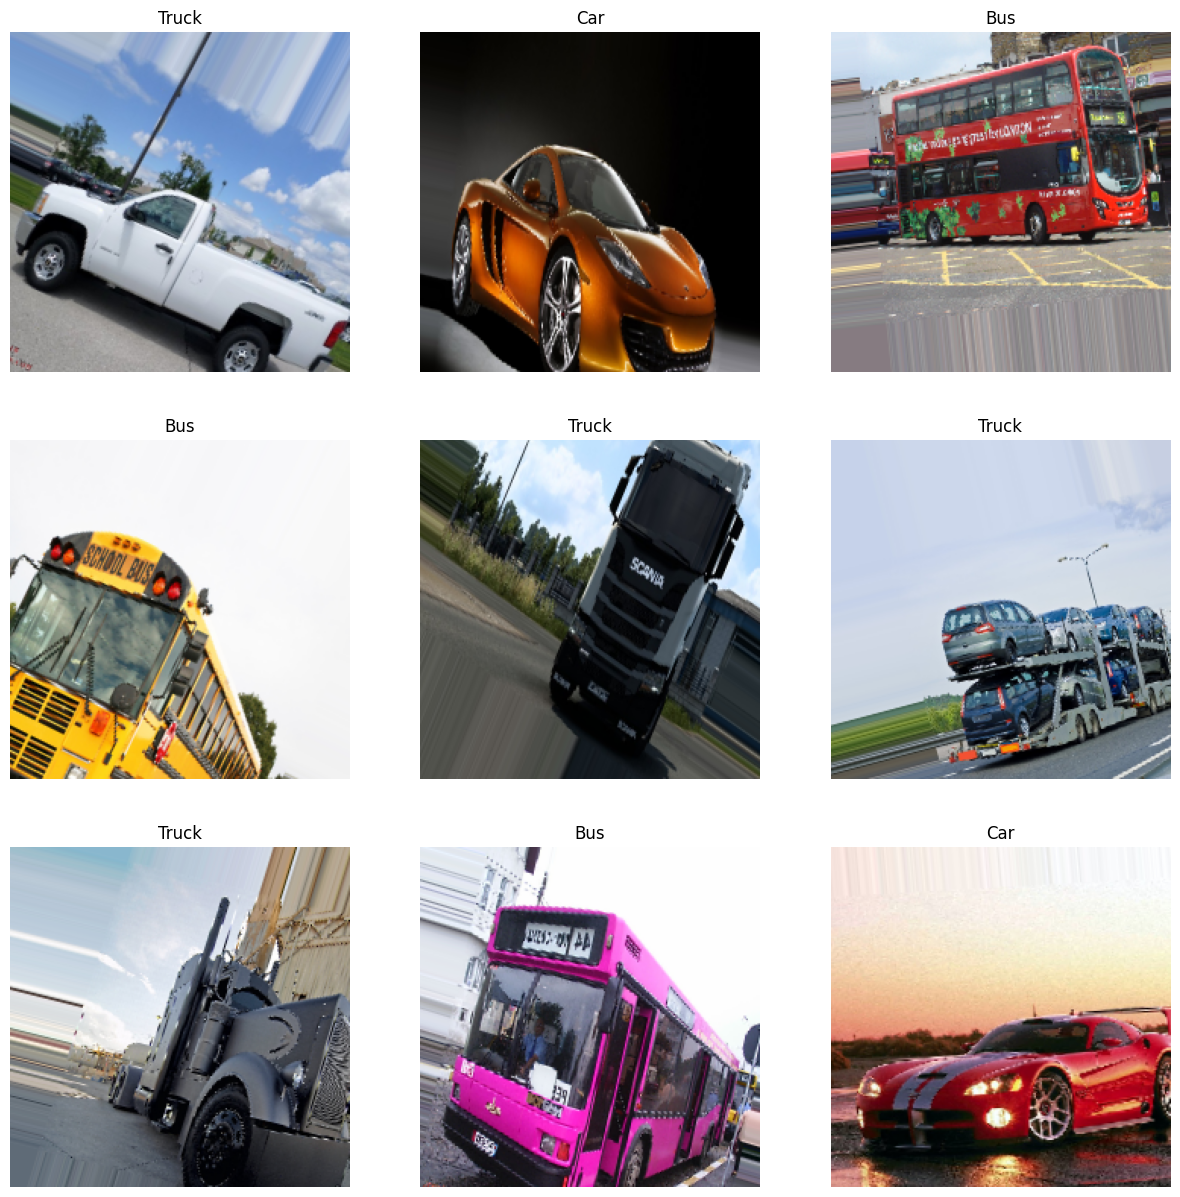

In [7]:
import matplotlib.pyplot as plt

# Get the class labels
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())

# Display the images and their labels
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(9):
    x, y = train_generator.next()
    image = x[0]
    label = y[0]
    label = np.argmax(label)
    label = class_labels[label]
    ax[i//3, i%3].imshow(image)
    ax[i//3, i%3].set_title(label)
    ax[i//3, i%3].axis('off')
plt.show()

In [8]:
image_size = (224, 224)
batch_size = 32
# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the base model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
# Train the model

history_1 = model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=50)

<ipython-input-10-3500d11ce4b6>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_1 = model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=50)


Epoch 1/50
12/12 [==============================] - 47s 3s/step - loss: 1.6324 - accuracy: 0.3967
Epoch 2/50
12/12 [==============================] - 14s 1s/step - loss: 0.7487 - accuracy: 0.6927
Epoch 3/50
12/12 [==============================] - 13s 1s/step - loss: 0.6017 - accuracy: 0.7708
Epoch 4/50
12/12 [==============================] - 13s 1s/step - loss: 0.5947 - accuracy: 0.7552
Epoch 5/50
12/12 [==============================] - 13s 1s/step - loss: 0.5690 - accuracy: 0.7582
Epoch 6/50
12/12 [==============================] - 14s 1s/step - loss: 0.4491 - accuracy: 0.8370
Epoch 7/50
12/12 [==============================] - 13s 1s/step - loss: 0.4334 - accuracy: 0.8370
Epoch 8/50
12/12 [==============================] - 12s 992ms/step - loss: 0.5609 - accuracy: 0.7853
Epoch 9/50
12/12 [==============================] - 12s 967ms/step - loss: 0.3980 - accuracy: 0.8315
Epoch 10/50
12/12 [==============================] - 13s 1s/step - loss: 0.3866 - accuracy: 0.8397
Epoch 11/50
1

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
_________________________________________________________________


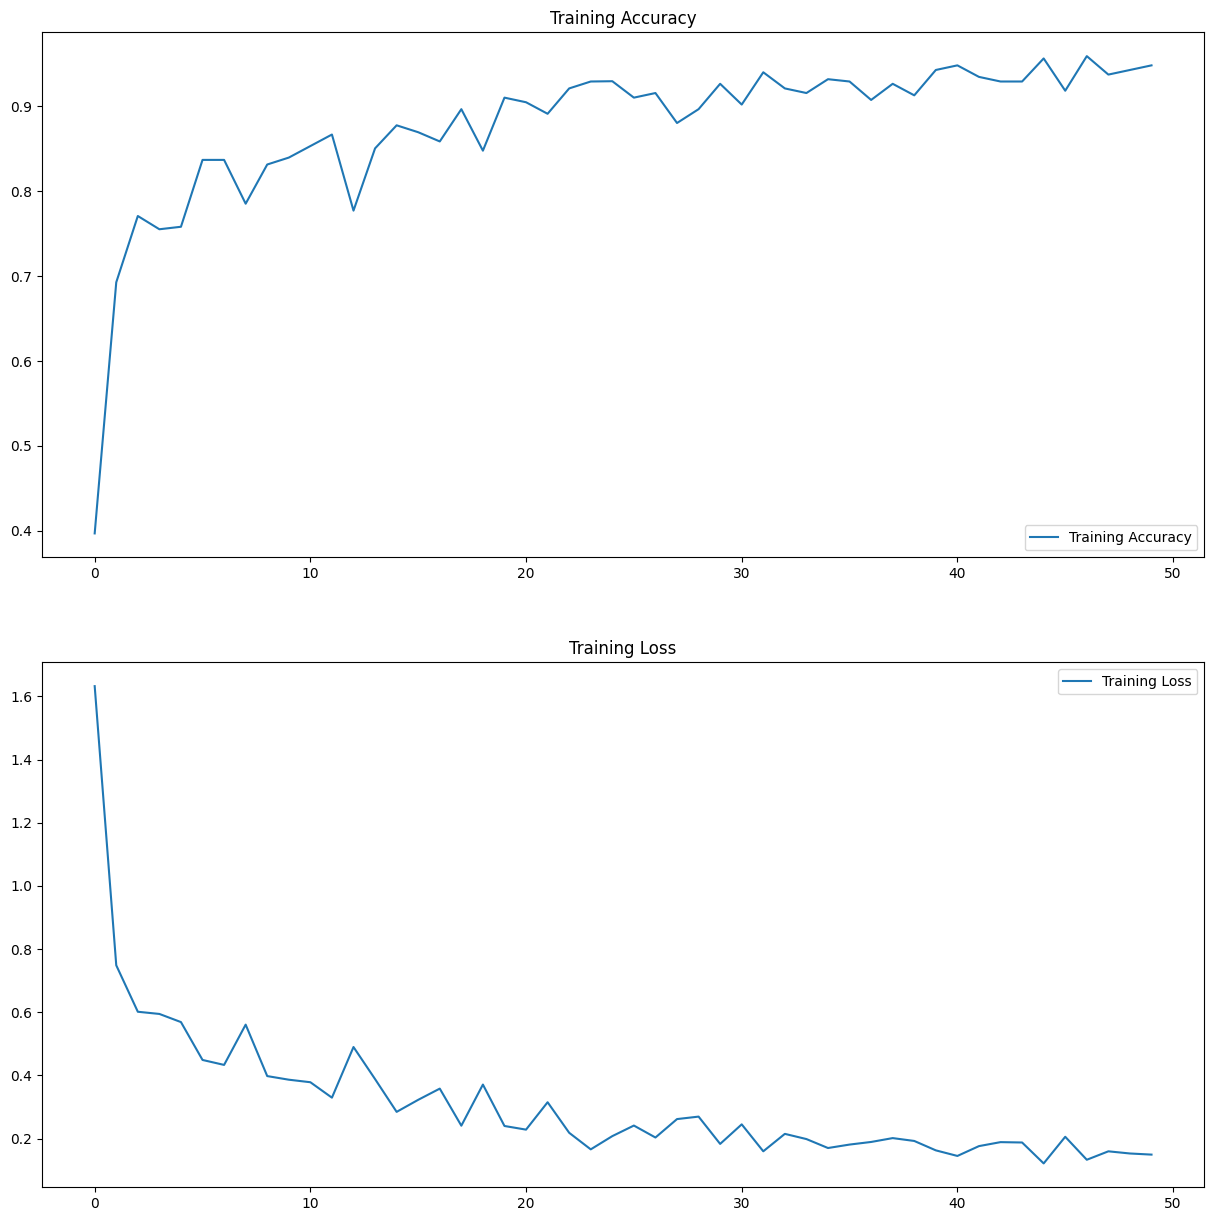

In [17]:
# Display the data

import matplotlib.pyplot as plt

acc = history_1.history['accuracy']
loss = history_1.history['loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

## Now let's use the model to predict

1/1 [==============================] - 0s 19ms/step


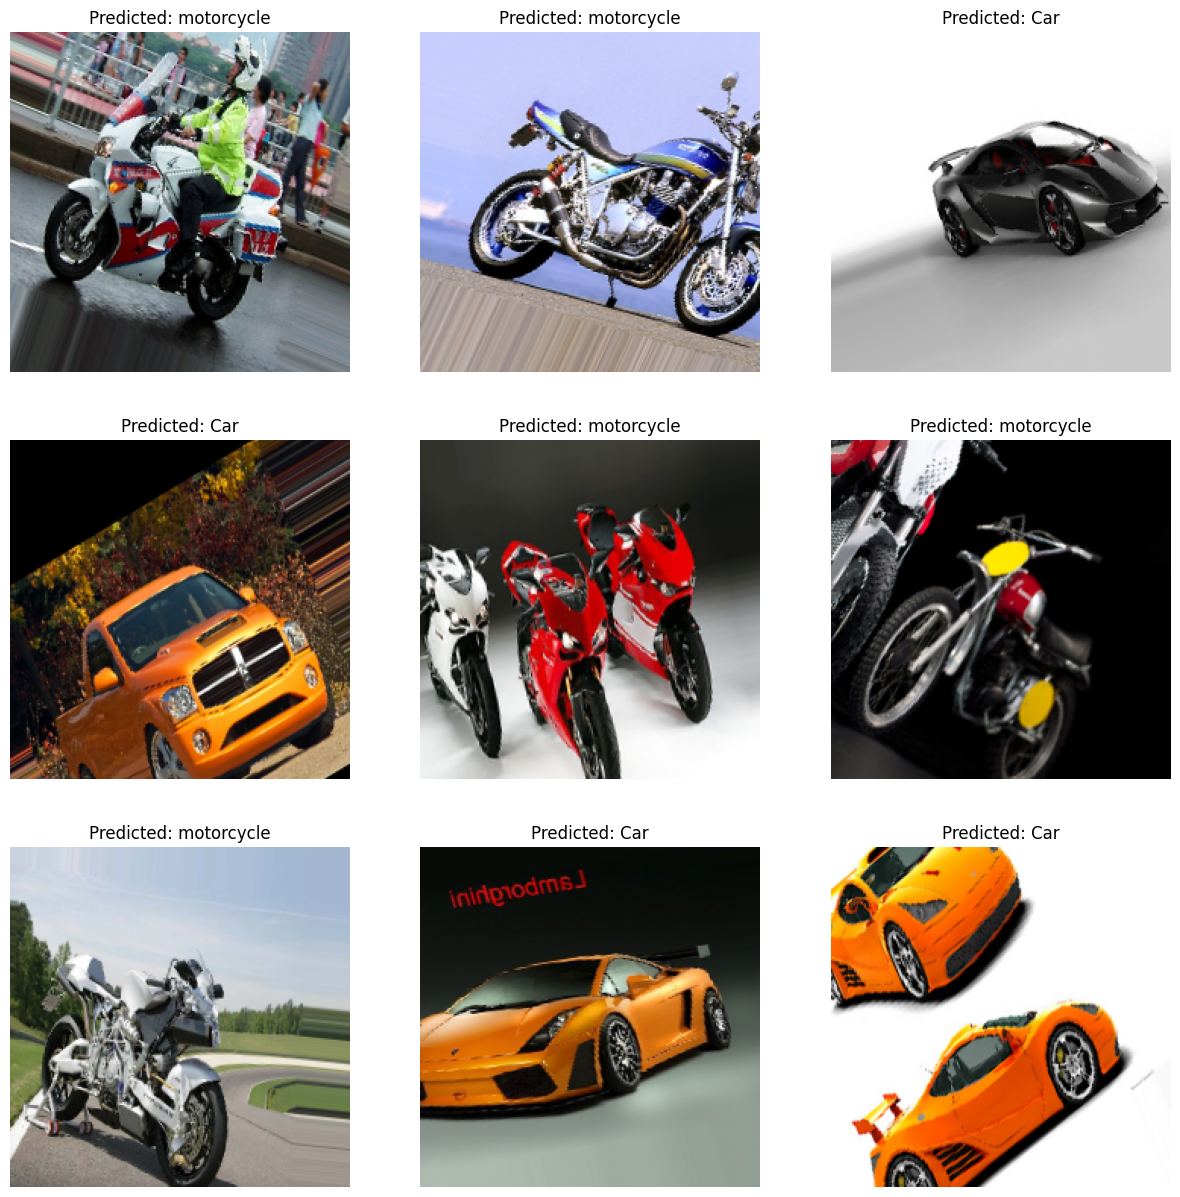

In [23]:


# Get the class labels
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())

# Display the images and their predicted labels
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(9):
    x, y = train_generator.next()
    image = x[0]
    label = y[0]
    # Get the predicted label
    pred = model.predict(np.expand_dims(image, axis=0))
    pred_label = np.argmax(pred)
    pred_label = class_labels[pred_label]
    ax[i//3, i%3].imshow(image)
    ax[i//3, i%3].set_title(f'Predicted: {pred_label}')
    ax[i//3, i%3].axis('off')
plt.show()